<a href="https://colab.research.google.com/github/R-Owino/HOUSE-PRICE-PREDICTION/blob/house-price/Moringa_Data_Science_Core_W7_Independent_Project_2022_04_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question
Study the factors that affect housing prices using the given information on real estate properties and create a model that allows sale price prediction given predictor variables.

### b) Defining the Metric for Success
Build different models using various techniques and choosing the best model based on the accuracy.

### c) Understanding the context 
House price is dependent on several factors such as the number of bedrooms, the number of bathrooms, the number of floors, whether waterfront is there or not, 
the year the house was built, the year the house was renovated and the place the house is located, just to name a few. building a model that correctly predicts house prices for sale would be of utmost importance to the company, given the factors. 


### d) Recording the Experimental Design
- Load the dataset
- Clean the data
- Perform EDA
- Build a model using linear regression technique
- Challenge the linear regression model by using other techniques to perform prediction
- Choose the most suitable technique for prediction

### e) Data Relevance

## 2. Reading the Data

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import KFold,GridSearchCV

print('All libraries are imported')

All libraries are imported


In [4]:
# Loading the Dataset
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
df = pd.read_csv(url) 

## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
print('There are ' +str(df.shape[0])+ ' rows and ' +str(df.shape[1])+ ' columns in the dataset')

There are 21613 rows and 20 columns in the dataset


In [6]:
# Previewing the top of our dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Previewing the bottom of our dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
# Checking whether each column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Column description:
- Id 
- price  - Price of the house
- bedrooms - Number of Bedrooms
- bathrooms - Number of Bathrooms
- sqft_living - Square feet area of living area
- sqft_lot  - Square feet area of parking Layout
- floors - Number of Floors
- waterfront - Whether waterfront is there or not
- view - Number of Views
- condition - condition of the house
- grade - Grades
- sqft_above
- sqft_basement - Square feet area of basement
- yr_built - Year the house is built
- yr_renovated - Year the house is renovated
- zipcode - zipcode os the house
- lat : Latitude of the house
- lon : Longitude of the house
- sqft_living15
- sqft_lot15

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

For validation, I will use a dataset containing zip codes in United States to check against the zip codes in our dataset.

In [24]:
zip = pd.read_csv('/content/zip_code_database.csv')
zip.tail(3)


,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
42721,99928,PO BOX,0,Ward Cove,NaN,NaN,AK,Ketchikan Gateway Borough,America/Sitka,907,NaN,US,55.45,-131.79,1530
42722,99929,PO BOX,0,Wrangell,NaN,NaN,AK,Wrangell City and Borough,America/Sitka,907,NaN,US,56.41,-131.61,2145
42723,99950,PO BOX,0,Ketchikan,"Edna Bay, Kasaan",NaN,AK,Prince of Wales-Outer Ketchikan Borough,America/Sitka,907,NaN,US,55.34,-131.64,262


In [23]:
# validation 
df['zipcode'].isin(zip['zip']).value_counts()

True    21613
Name: zipcode, dtype: int64

All the zip codes in our dataset are in the zip code database, hence validation checked.

## 5. Tidying the Dataset

In [25]:
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


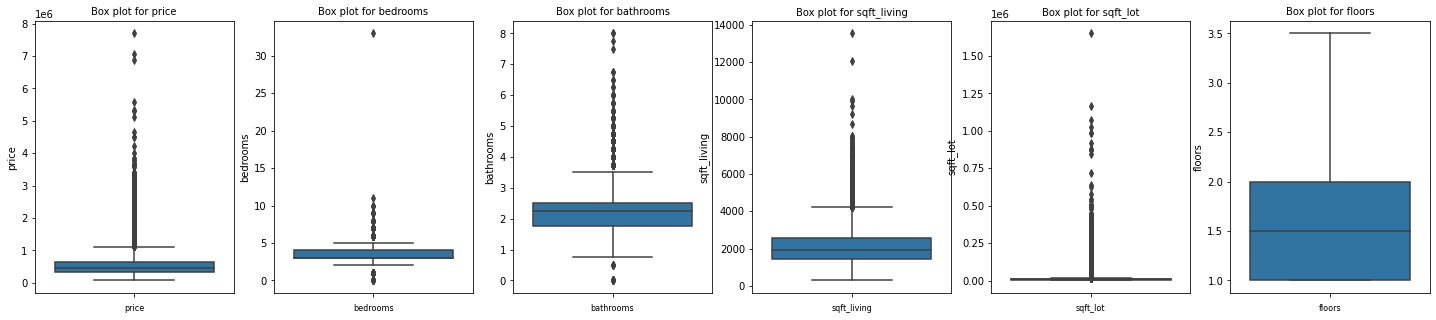

In [29]:
# Checking for Outliers
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(25,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = df[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


box(cols)

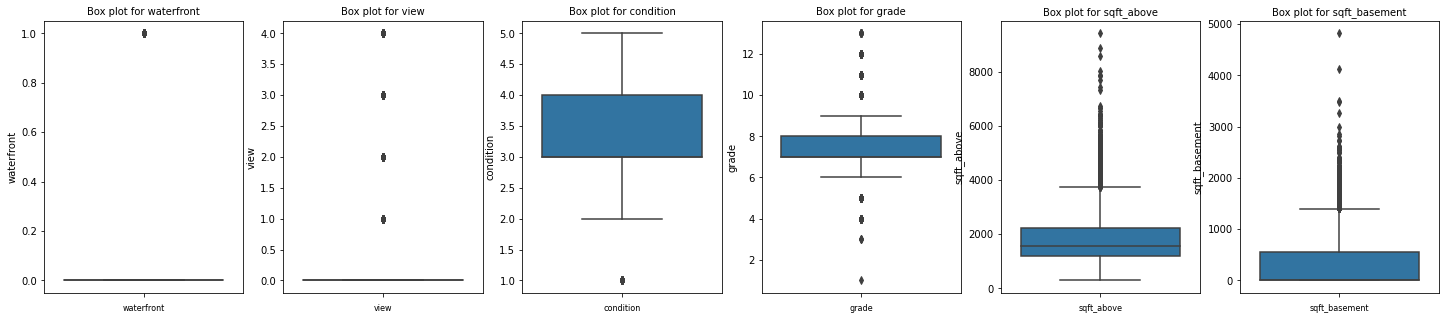

In [30]:
cols = ['waterfront', 'view',	'condition',	'grade', 'sqft_above', 'sqft_basement']
box(cols)

In [32]:
# Checking for Anomalies
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
             'waterfront', 'view',	'condition',	'grade', 'sqft_above', 'sqft_basement']
             
def quantiles(columns):
  for column in columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1 = {Q1},Q3 = {Q3}, IQR = {IQR}, lowerbound = {lb}, upperbound = {ub}')

quantiles(col_names)

price : 
Q1 = 321950.0,Q3 = 645000.0, IQR = 323050.0, lowerbound = -162625.0, upperbound = 1129575.0
bedrooms : 
Q1 = 3.0,Q3 = 4.0, IQR = 1.0, lowerbound = 1.5, upperbound = 5.5
bathrooms : 
Q1 = 1.75,Q3 = 2.5, IQR = 0.75, lowerbound = 0.625, upperbound = 3.625
sqft_living : 
Q1 = 1427.0,Q3 = 2550.0, IQR = 1123.0, lowerbound = -257.5, upperbound = 4234.5
sqft_lot : 
Q1 = 5040.0,Q3 = 10688.0, IQR = 5648.0, lowerbound = -3432.0, upperbound = 19160.0
floors : 
Q1 = 1.0,Q3 = 2.0, IQR = 1.0, lowerbound = -0.5, upperbound = 3.5
waterfront : 
Q1 = 0.0,Q3 = 0.0, IQR = 0.0, lowerbound = 0.0, upperbound = 0.0
view : 
Q1 = 0.0,Q3 = 0.0, IQR = 0.0, lowerbound = 0.0, upperbound = 0.0
condition : 
Q1 = 3.0,Q3 = 4.0, IQR = 1.0, lowerbound = 1.5, upperbound = 5.5
grade : 
Q1 = 7.0,Q3 = 8.0, IQR = 1.0, lowerbound = 5.5, upperbound = 9.5
sqft_above : 
Q1 = 1190.0,Q3 = 2210.0, IQR = 1020.0, lowerbound = -340.0, upperbound = 3740.0
sqft_basement : 
Q1 = 0.0,Q3 = 560.0, IQR = 560.0, lowerbound = -840.0, up

In [39]:
# Identifying the Missing Data
print('Sum of missing values is: ', df.isnull().sum().sum())

Sum of missing values is:  0


In [41]:
# More data cleaning procedures

# Check for duplicates
print('Sum of duplicates: ', df.duplicated().sum())

duplicate = df[df.duplicated()] 
print('Duplicate Rows :') 
duplicate

# the duplicates are not from the same id, I will not drop them

Sum of duplicates:  3
Duplicate Rows :


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [42]:
# drop irrelevant columns
df.drop(['id', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace = True)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319


## 6. Exploratory Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#

## 7. Implementing the Solution

####Multiple Linear Regression 

## 8. Challenging the solution

####Quantile Regression 

####Ridge Regression 

####Lasso Regression 

####Elastic-Net Regression

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?